# Análisis de regresión logística

In [4]:
# Instala dependencias
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase15_BaseRegresionLogistica.sav

# Ejercicio

Un grupo de investigadores e investigadoras esperan que el estrés la ansiedad y la sintomatología de depresión contribuyan positivamente en los problemas de sueño de trabajadores médicos hospitalarios.

HT: El estrés, la ansiedad y depresión contribuyen a los problemas de sueño de las/los trabajadores médicos de hospital
- $H_{0}$: $β_{estres} = β_{ansiedad} = β_{depresion} = 0$
- $H_{1}$: $β_{estres} > β_{ansiedad} > β_{depresion} > 0$

Ecuación del modelo de regresión logística:

Logit (problemas de sueño) = $β_{0} - β_{estres} + β_{ansiedad} + β_{depresion}$ 

## Carga de datos

In [10]:
import pandas as pd

df = pd.read_spss("Clase15_BaseRegresionLogistica.sav")
dict_map = {"Sí": 1.0, "No": 0.0}
df["ProbSueño"] = df["ProbSueño"].map(dict_map)
df["ProbSueño"] = pd.to_numeric(df["ProbSueño"])
df

,Código,Sexo,Edad,ProbSueño,Estrés,Ansiedad,Depresión
0,001,Mujer,40.0,1.0,5.0,7.0,3.0
1,002,Hombre,26.0,1.0,8.0,6.0,1.0
2,003,Hombre,19.0,0.0,2.0,3.0,1.0
3,004,Hombre,35.0,0.0,2.0,1.0,2.0
4,005,Hombre,35.0,0.0,8.0,2.0,5.0
...,...,...,...,...,...,...,...
95,096,Mujer,29.0,1.0,6.0,6.0,3.0
96,097,Mujer,39.0,0.0,6.0,4.0,0.0
97,098,Mujer,43.0,1.0,7.0,12.0,11.0
98,099,Hombre,30.0,1.0,7.0,14.0,9.0


## Ajuste del modelo

In [12]:
import statsmodels.formula.api as smf

model = smf.logit("ProbSueño ~ Estrés + Ansiedad + Depresión", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.547119
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ProbSueño   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                  0.2070
Time:                        08:35:12   Log-Likelihood:                -54.712
converged:                       True   LL-Null:                       -68.994
Covariance Type:            nonrobust   LLR p-value:                 2.764e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8838      0.701     -4.114      0.000      -4.258      -1.510
Estrés         0.1807      0.114      1.586      0.113      -0.043       0.404
Ansiedad       0.2291      0.098      2.347      0.019       0.038       0.421
Depresión      0.0814      0.099      0.824      0.410      -0.112       0.275
==============================================================================
"""

## Tabla de clasificación

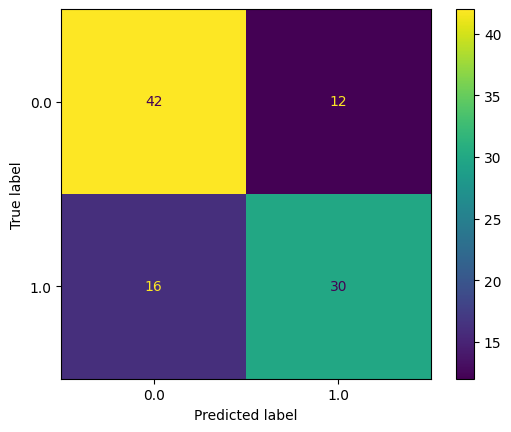

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(df["ProbSueño"], model.predict()>0.5)

In [67]:
from sklearn import metrics
print("Sensibilidad:", metrics.recall_score(df["ProbSueño"], model.predict()>0.5))
print("Especificidad:", metrics.recall_score(df["ProbSueño"], model.predict()>0.5, pos_label=0))
print("Porcentaje global:", metrics.accuracy_score(df["ProbSueño"], model.predict()>0.5))

Sensibilidad: 0.6521739130434783
Especificidad: 0.7777777777777778
Porcentaje global: 0.72


### Interpretación de coeficientes del modelo

In [13]:
import numpy as np

(np.exp(model.params) - 1) * 100

Intercept   -94.407572
Estrés       19.802747
Ansiedad     25.751879
Depresión     8.480444
dtype: float64